## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Read files
df_flights = pd.read_csv("data/flights.csv")

In [3]:
df_flights.head()

,fl_date,mkt_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,security_delay,late_aircraft_delay,mkt_carrier_name,year,month,day_of_month,day_of_week,haul_length,route,flight_delayed
0,2018-05-04,DL,N754EV,BOS,"Boston, MA",RIC,"Richmond, VA",1455,1453.0,-2.0,...,0.0,0.0,Delta Air Lines,2018,5,4,4,short,BOS-RIC,0
1,2019-12-09,UA,N828UA,MSY,"New Orleans, LA",EWR,"Newark, NJ",1515,1757.0,162.0,...,0.0,0.0,United Airlines,2019,12,9,0,short,MSY-EWR,1
2,2019-12-20,AA,N763US,CLT,"Charlotte, NC",SAT,"San Antonio, TX",1610,1630.0,20.0,...,0.0,0.0,American Airlines,2019,12,20,4,short,CLT-SAT,1
3,2019-07-14,DL,N961DL,ATL,"Atlanta, GA",PWM,"Portland, ME",2114,2114.0,0.0,...,0.0,0.0,Delta Air Lines,2019,7,14,6,short,ATL-PWM,0
4,2019-04-08,AA,N679AW,PHX,"Phoenix, AZ",BOI,"Boise, ID",2021,2015.0,-6.0,...,0.0,0.0,American Airlines,2019,4,8,0,short,PHX-BOI,0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

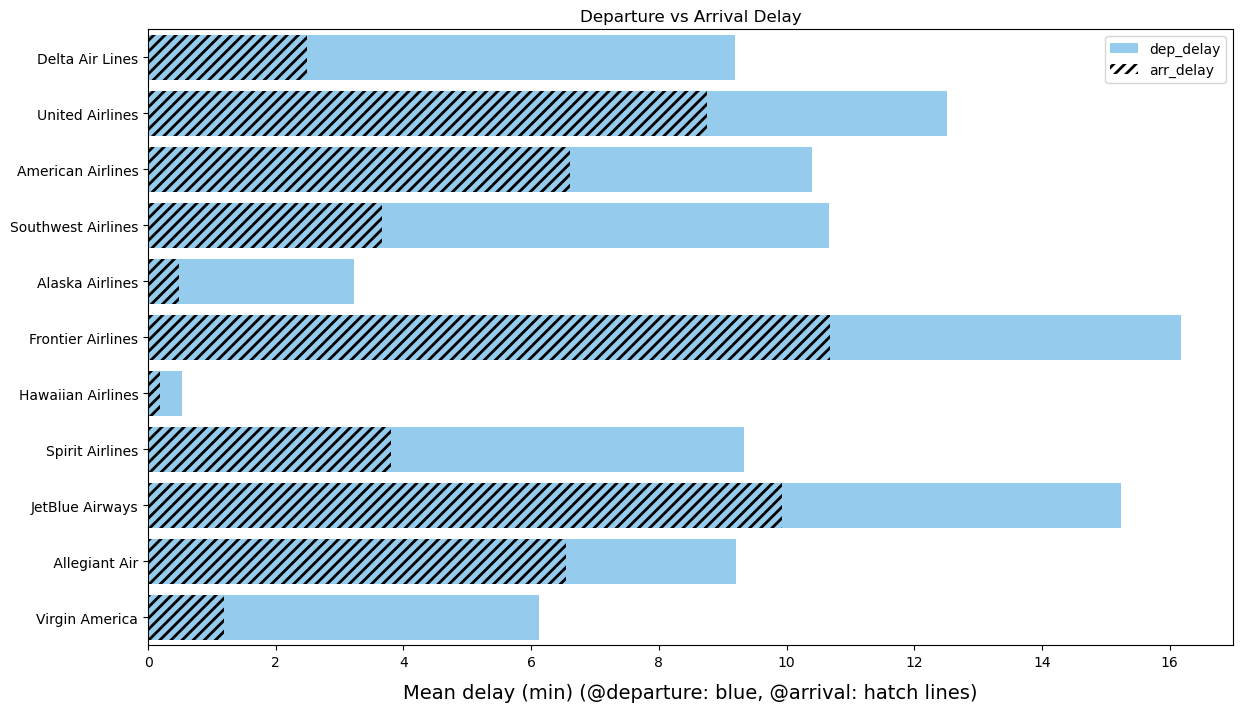

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(14,8))
ax = sns.barplot(x="dep_delay", y="mkt_carrier_name", label= 'dep_delay', data=df_flights, color="lightskyblue", ci=None)
ax = sns.barplot(x="arr_delay", y="mkt_carrier_name", label= 'arr_delay', data=df_flights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min) (@departure: blue, @arrival: hatch lines)', fontsize=14, labelpad=10);
ax.legend(loc='upper right')
plt.show()

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [33]:
df_dur = pd.DataFrame(df_flights['haul_length'].value_counts().reset_index().values, columns=["haul_length", "AggregateType"])

labels = ["Short Haul","Medium Haul","Long Haul"]

values = [df_dur['AggregateType'][0],df_dur['AggregateType'][1],df_dur['AggregateType'][2]]

figs = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.3],textinfo = 'label+percent', hole = 0.3, hoverinfo="label+percent")])
figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.update_layout(
    title_text="<b>Flights By Duration<b>",title_x = 0.5, font_size = 12,legend=dict(x=.75, y=0.55),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='<i>Duration<i>', x=0.5, y=0.5, font_size=11, showarrow=False)]
)
figs.show()

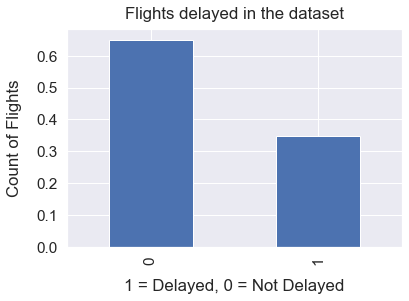

In [42]:

sns.set(font_scale=1.4)
df_flights.flight_delayed.value_counts(normalize=True).plot(kind = 'bar')
plt.xlabel("1 = Delayed, 0 = Not Delayed", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Flights delayed in the dataset", y=1.02);

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?